# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 1

In [217]:
# read the iris data into a pandas DataFrame, including column names
df = pd.read_csv("iris.csv")
df.columns = ['ID','sepal_length','sepal_width','petal_length','petal_width','species']
df['species'] = df['species'].map({'Iris-setosa':'setosa','Iris-versicolor':'versicolor','Iris-virginica':'virginica'})

## Task 2

In [218]:
# gather basic information
df.head(10)

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
ID              150 non-null int64
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [220]:
df.describe()

,ID,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [221]:
df.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [222]:
df_setosa = df[df.species == 'Iris-setosa' ]
df_versicolor = df[df.species == 'Iris-versicolor' ]
df_virginica = df[df.species == 'Iris-virginica' ]


## Task 3

In [223]:
# use groupby to look for differences between the species
df.groupby('species')[['sepal_length','sepal_width','petal_length','petal_width']].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [224]:
df.groupby('species')[['sepal_length','sepal_width','petal_length','petal_width']].median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [225]:
# use sorting to look for differences between the species
df.sort_values('sepal_length',ascending=False)

,ID,sepal_length,sepal_width,petal_length,petal_width,species
131,132,7.9,3.8,6.4,2.0,virginica
135,136,7.7,3.0,6.1,2.3,virginica
122,123,7.7,2.8,6.7,2.0,virginica
117,118,7.7,3.8,6.7,2.2,virginica
118,119,7.7,2.6,6.9,2.3,virginica
105,106,7.6,3.0,6.6,2.1,virginica
130,131,7.4,2.8,6.1,1.9,virginica
107,108,7.3,2.9,6.3,1.8,virginica
125,126,7.2,3.2,6.0,1.8,virginica
109,110,7.2,3.6,6.1,2.5,virginica


In [226]:
x = pd.get_dummies(df.species)
new_df = pd.concat([df,x],axis = 1)
new_df = new_df.drop('species',axis =1)
new_df

,ID,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
5,6,5.4,3.9,1.7,0.4,1,0,0
6,7,4.6,3.4,1.4,0.3,1,0,0
7,8,5.0,3.4,1.5,0.2,1,0,0
8,9,4.4,2.9,1.4,0.2,1,0,0
9,10,4.9,3.1,1.5,0.1,1,0,0


### Scatter plots



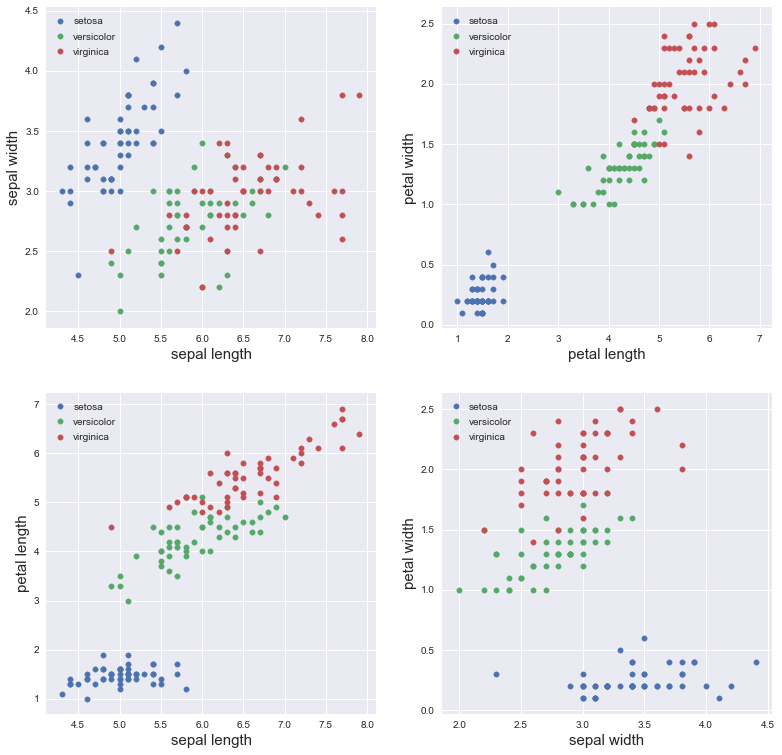

In [227]:
# use plotting to look for differences between the species
sns.set_style("darkgrid")
groups = df.groupby('species')
fig = plt.figure( figsize = (13,13))

for name,group in groups:
    
    ax1 = fig.add_subplot(221)
    ax1.scatter(group.sepal_length,group.sepal_width, s=30, label=name)
    ax1.set_xlabel('sepal length',fontsize = 15)
    ax1.set_ylabel('sepal width',fontsize = 15)
    
    ax2 = fig.add_subplot(222)
    ax2.scatter(group.petal_length,group.petal_width, s=30, label=name)
    ax2.set_xlabel('petal length',fontsize = 15)
    ax2.set_ylabel('petal width',fontsize = 15)
    
    ax3 = fig.add_subplot(223)
    ax3.scatter(group.sepal_length,group.petal_length, s=30, label=name)
    ax3.set_xlabel('sepal length',fontsize = 15)
    ax3.set_ylabel('petal length',fontsize = 15)
    
    ax4 = fig.add_subplot(224)
    ax4.scatter(group.sepal_width,group.petal_width, s=30, label=name)
    ax4.set_xlabel('sepal width',fontsize = 15)
    ax4.set_ylabel('petal width',fontsize = 15)

ax1.legend(loc = "upper left",markerscale=1,handlelength = 1,handleheight = 1.1 )
ax2.legend(loc = "upper left",markerscale=1,handlelength = 1,handleheight = 1.1 )
ax3.legend(loc = "upper left",markerscale=1,handlelength = 1,handleheight = 1.1 )
ax4.legend(loc = "upper left",markerscale=1,handlelength = 1,handleheight = 1.1 )    


plt.show()
plt.savefig("iris_scatter.png")


### Histograms

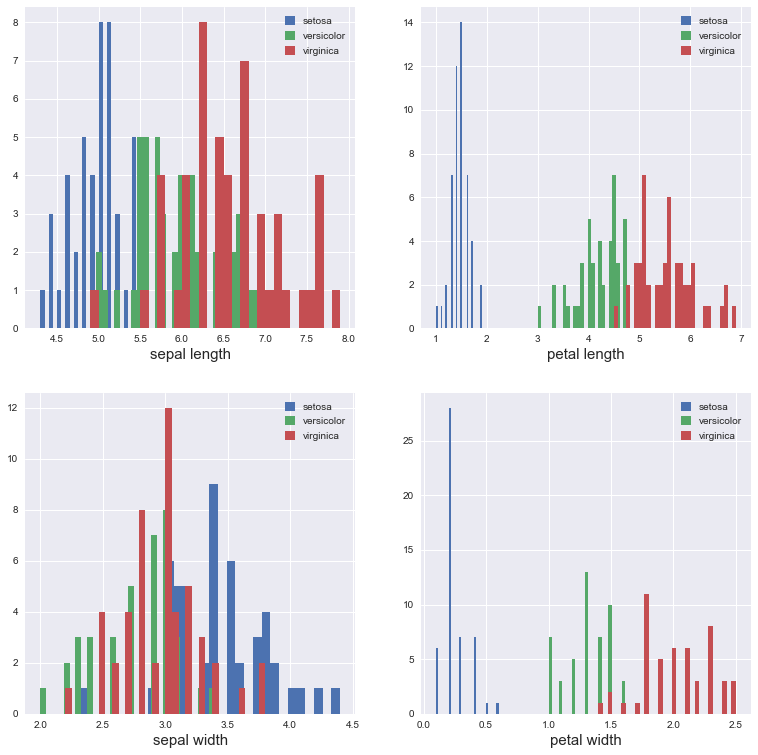

In [228]:
sns.set_style("darkgrid")
groups = df.groupby('species')
fig = plt.figure( figsize = (13,13))

for name,group in groups:
    
    ax1 = fig.add_subplot(221)
    ax1.hist(group.sepal_length, bins=30, label=name)
    ax1.set_xlabel('sepal length',fontsize = 15)
    
    
    ax2 = fig.add_subplot(222)
    ax2.hist(group.petal_length, bins=30, label=name)
    ax2.set_xlabel('petal length',fontsize = 15)
    
    
    ax3 = fig.add_subplot(223)
    ax3.hist(group.sepal_width, bins=30, label=name)
    ax3.set_xlabel('sepal width',fontsize = 15)
    
    ax4 = fig.add_subplot(224)
    ax4.hist(group.petal_width, bins=30, label=name)
    ax4.set_xlabel('petal width',fontsize = 15)
    
ax1.legend(loc = "upper right",markerscale=1,handlelength = 1,handleheight = 1 )
ax2.legend(loc = "upper right",markerscale=1,handlelength = 1,handleheight = 1 )
ax3.legend(loc = "upper right",markerscale=1,handlelength = 1,handleheight = 1 )
ax4.legend(loc = "upper right",markerscale=1,handlelength = 1,handleheight = 1 )    


plt.show()
plt.savefig('iris_histogram.png')

### Boxplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209BA45A518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000209C6E45EF0>]], dtype=object)

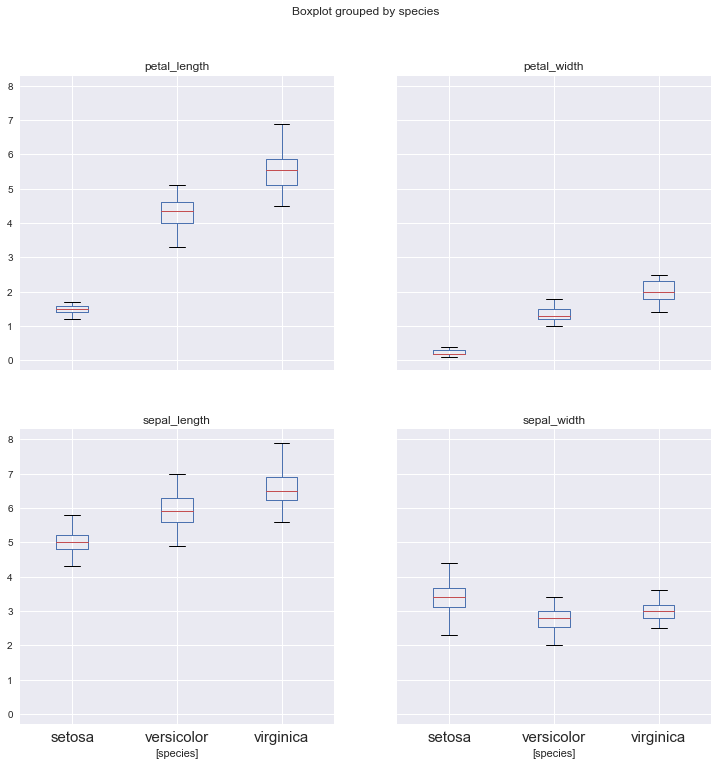

In [229]:
df.drop("ID", axis=1).boxplot( by="species", figsize=(12,12),fontsize = 15)

C:\Users\Arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


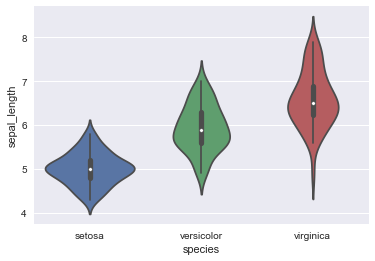

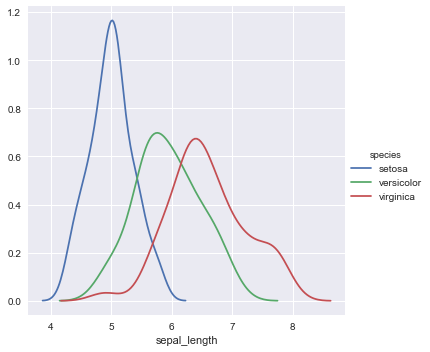

In [230]:
sns.violinplot(x=df.species, y=df.sepal_length)
sns.FacetGrid(df, hue="species", size=5).map(sns.kdeplot, "sepal_length").add_legend()

C:\Users\Arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


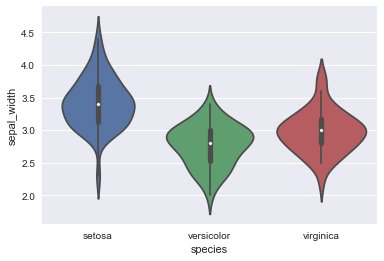

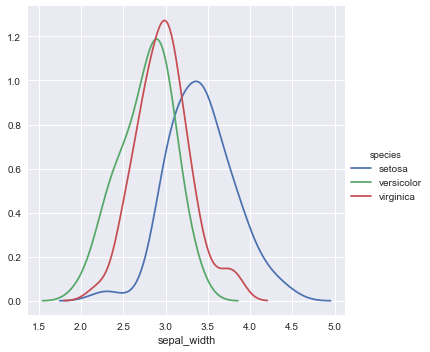

In [231]:
sns.violinplot(x=df.species, y=df.sepal_width)
sns.FacetGrid(df, hue="species", size=5).map(sns.kdeplot, "sepal_width").add_legend()

C:\Users\Arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


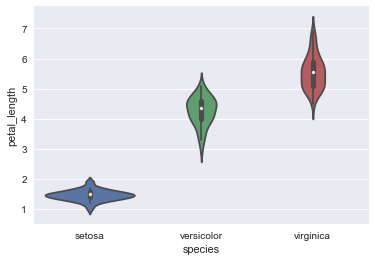

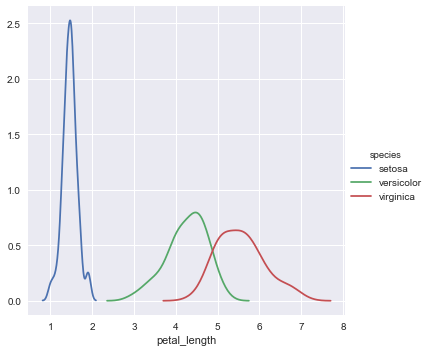

In [232]:
sns.violinplot(x=df.species, y=df.petal_length)
sns.FacetGrid(df, hue="species", size=5).map(sns.kdeplot, "petal_length").add_legend()

C:\Users\Arjun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


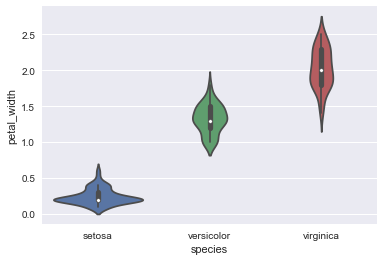

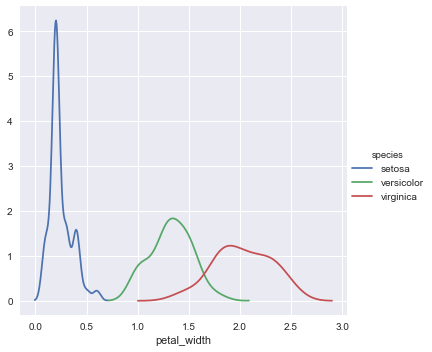

In [233]:
sns.violinplot(x=df.species, y=df.petal_width)
sns.FacetGrid(df, hue="species", size=5).map(sns.kdeplot, "petal_width").add_legend()

In [234]:
# map species to a numeric value so that plots can be colored by category


## Task 4

Come up with a set of rules that could be used to predict species based upon measurements.

In [235]:
new_df.corr()
import statsmodels.api as sm
x = df['species'].map({'setosa':1,'versicolor':2,'virginica':3})
final_df = pd.concat([df.iloc[:,0:5],x],axis =1)
final_df = final_df.drop('ID',axis = 1)
final_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [238]:
X = final_df.iloc[:,0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [239]:
y = final_df[['species']]

In [240]:
X1 = sm.add_constant(X)
X1.head()

,const,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2


In [242]:
est = sm.OLS(y,X1)
pred_species = est.fit()
#get summary of model

pred_species.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                species   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     484.8
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           8.21e-83
Time:                        22:53:31   Log-Likelihood:                 17.468
No. Observations:                 150   AIC:                            -24.94
Df Residuals:                     145   BIC:                            -9.882
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            1.1921      0.205      5.824      0.000         0.788     1.597
sepal_length    -0.1097      0.058     -1.900      0.059        -0.224     0.004
sepal_width     -0.0442      0.060     -0.738      0.462        -0.163     0.074
petal_length     0.2270      0.057      3.983      0.000         0.114     0.340
petal_width      0.6099      0.094      6.456      0.000         0.423     0.797
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.138
Skew:                          -0.052   Prob(JB):                        0.933
Kurtosis:                       3.106   Cond. No.                         91.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
new_X1 = X1.drop('sepal_width',1)
est = sm.OLS(y,new_X1)
pred_species = est.fit()
#get summary of model

pred_species.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                species   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     648.2
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           3.89e-84
Time:                        23:00:18   Log-Likelihood:                 17.186
No. Observations:                 150   AIC:                            -26.37
Df Residuals:                     146   BIC:                            -14.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            1.1463      0.195      5.886      0.000         0.761     1.531
sepal_length    -0.1366      0.045     -3.053      0.003        -0.225    -0.048
petal_length     0.2530      0.045      5.663      0.000         0.165     0.341
petal_width      0.5848      0.088      6.646      0.000         0.411     0.759
==============================================================================
Omnibus:                        0.572   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.283
Skew:                          -0.075   Prob(JB):                        0.868
Kurtosis:                       3.151   Cond. No.                         82.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X1, y , train_size = 0.8, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [246]:
from sklearn import linear_model

#Linear Regression
reg = linear_model.LinearRegression()
regmodel = reg.fit(X_train,y_train)

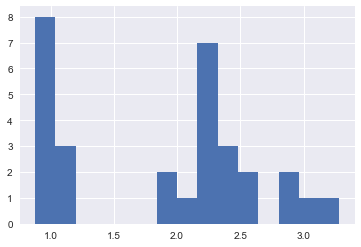

In [261]:
y_predtest = regmodel.predict(X_test)
plt.hist(y_predtest,bins =15)
y_round = []
for a in y_predtest:
    if a < 1.5:
        y_round.append(1)
    elif (a <= 2.5) & (a >= 1.5):
        y_round.append(2)
    else:
        y_round.append(3)
        
y_round = np.asarray(y_round)
y_round = pd.DataFrame(y_round)

In [259]:
from sklearn.metrics import mean_squared_error
RMSE_test = mean_squared_error(y_test,y_round)**0.5
print(RMSE_test)

0.0


In [263]:
result = pd.concat([final_df,y_round],axis =1)
result.head()

,sepal_length,sepal_width,petal_length,petal_width,species,0
0,5.1,3.5,1.4,0.2,1,3.0
1,4.9,3.0,1.4,0.2,1,2.0
2,4.7,3.2,1.3,0.2,1,1.0
3,4.6,3.1,1.5,0.2,1,3.0
4,5.0,3.6,1.4,0.2,1,1.0


## Bonus

In [236]:
# define function that accepts a row of data and returns a predicted species
